In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2911 - accuracy: 0.9132 - val_loss: 0.1393 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1400 - accuracy: 0.9580 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1057 - accuracy: 0.9684 - val_loss: 0.0824 - val_accuracy: 0.9743
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0739 - val_accuracy: 0.9782
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0736 - accuracy: 0.9770 - val_loss: 0.0722 - val_accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 7/10
60000/60000 [==============================] 

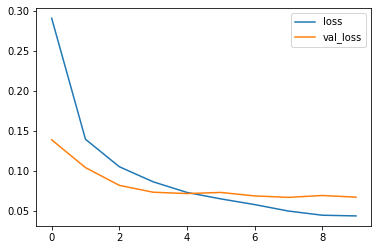

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

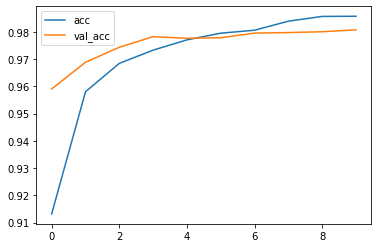

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06769740101181669, 0.9807]

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
      This function prints and plots the confusion matrix.
      Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


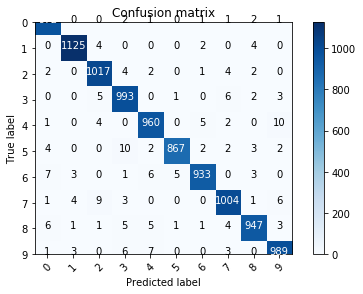

In [20]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

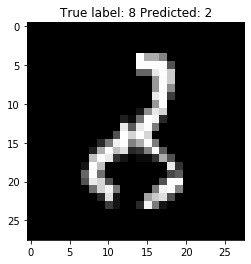

In [22]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));